In [3]:

import os
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
os.environ["CUDA_DEVICES_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical

In [4]:
print(tf.config.list_physical_devices())
# print(tf.test.is_gpu_available())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
from load_data_layer2 import load_training_data, load_testing_data

X, y = load_training_data()

------------------------------
Creating training images...
------------------------------
COVID-19 0
Done: 0/840 images
Done: 100/840 images
Done: 200/840 images
Done: 300/840 images
Done: 400/840 images
Done: 500/840 images
Done: 600/840 images
Done: 700/840 images
Done: 800/840 images
Non-COVID 1
Done: 0/840 images
Done: 100/840 images
Done: 200/840 images
Done: 300/840 images
Done: 400/840 images
Done: 500/840 images
Done: 600/840 images
Done: 700/840 images
Done: 800/840 images
0
Loading done.


In [6]:
def CNN_model():
        # CNN model architecture 
        cnn_model = Sequential()

        cnn_model.add(BatchNormalization(input_shape=(224,224,1)))
        cnn_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        cnn_model.add(MaxPool2D(pool_size=(2,2)))
        cnn_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        cnn_model.add(MaxPool2D(pool_size=(2,2)))
        cnn_model.add(Dropout(0.35))

        cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
        cnn_model.add(MaxPool2D(pool_size=(2,2)))
        cnn_model.add(Dropout(0.35))

        cnn_model.add(Flatten())
        cnn_model.add(Dense(128, activation='relu'))
        cnn_model.add(Dropout(0.35))
        cnn_model.add(Dense(2, activation='softmax'))
        cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        cnn_model.summary()
        return(cnn_model)

In [7]:
X.shape, y.shape

((1680, 224, 224, 1), (1680, 2))

In [8]:
# x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

In [9]:
cnn_model = CNN_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 32)        1

In [10]:
model_chkpt = tf.keras.callbacks.ModelCheckpoint('best_Layer2_model.h5', monitor='accuracy')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [11]:
history = cnn_model.fit(X, y, 
                validation_split=0.20,
                epochs=20, batch_size=32, shuffle=True, 
                callbacks=[model_chkpt ,early_stopping] 
                )

Epoch 1/20
42/42 [==============================] - 17s 260ms/step - loss: 0.8411 - accuracy: 0.7460 - val_loss: 0.7520 - val_accuracy: 0.3810
Epoch 2/20
42/42 [==============================] - 9s 218ms/step - loss: 0.0815 - accuracy: 0.9664 - val_loss: 0.7983 - val_accuracy: 0.5000
Epoch 3/20
42/42 [==============================] - 9s 213ms/step - loss: 0.0432 - accuracy: 0.9901 - val_loss: 0.3590 - val_accuracy: 0.8452
Epoch 4/20
42/42 [==============================] - 9s 213ms/step - loss: 0.0210 - accuracy: 0.9923 - val_loss: 0.2643 - val_accuracy: 0.9018
Epoch 5/20
42/42 [==============================] - 9s 213ms/step - loss: 0.0281 - accuracy: 0.9928 - val_loss: 0.0959 - val_accuracy: 0.9851
Epoch 6/20
42/42 [==============================] - 9s 215ms/step - loss: 0.0299 - accuracy: 0.9873 - val_loss: 0.0987 - val_accuracy: 0.9613
Epoch 7/20
42/42 [==============================] - 9s 213ms/step - loss: 0.0595 - accuracy: 0.9884 - val_loss: 0.1047 - val_accuracy: 0.9732
Epoch

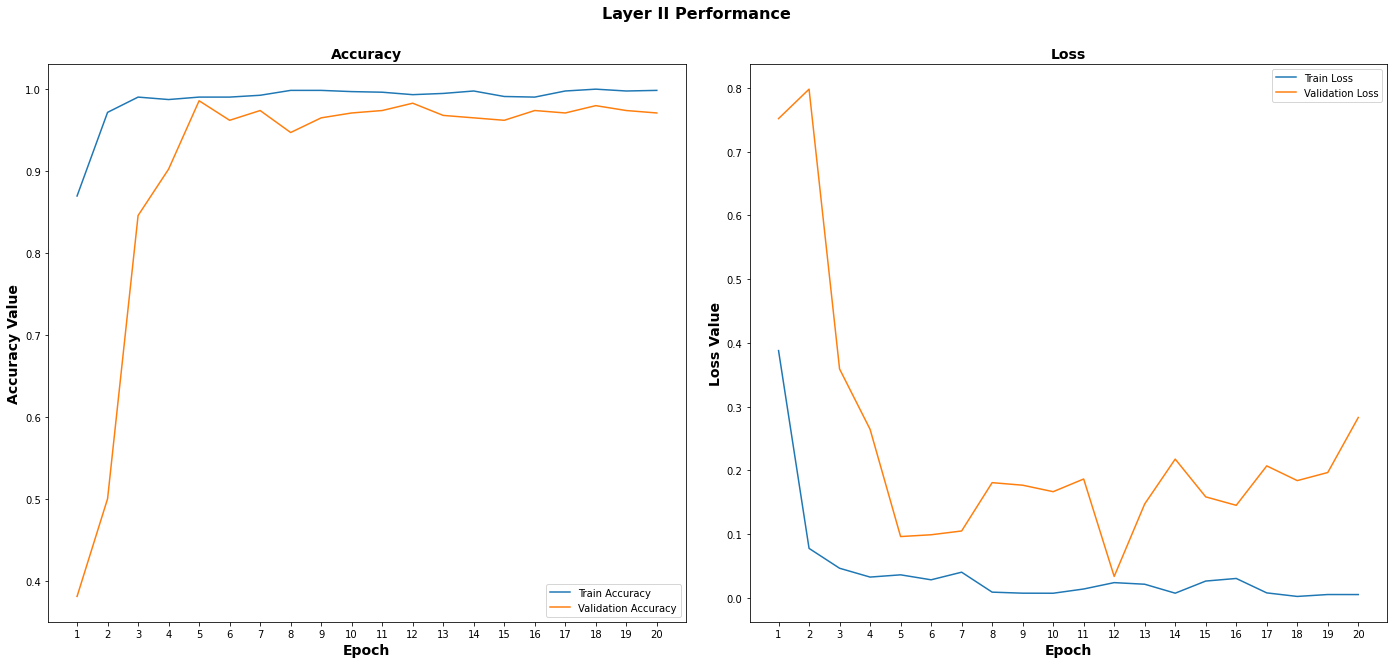

In [12]:
from sklearn.metrics import accuracy_score
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
t = f.suptitle('Layer II Performance', fontsize=16,fontweight='bold')
f.subplots_adjust(top=0.9, wspace=0.1)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value',fontsize=14,fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax1.set_title('Accuracy', fontsize=14,fontweight='bold')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value',fontsize=14,fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax2.set_title('Loss',fontsize=14,fontweight='bold')
l2 = ax2.legend(loc="best")

In [13]:
X_test, y_test = load_testing_data()

------------------------------
Creating testing images...
------------------------------
COVID-19 0
Done: 0/210 images
Done: 100/210 images
Done: 200/210 images
Non-COVID 1
Done: 0/210 images
Done: 100/210 images
Done: 200/210 images
0
Loading done.


c:\Users\Tan\anaconda3\envs\covid\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<function matplotlib.pyplot.show(close=None, block=None)>

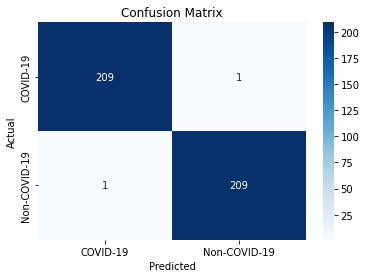

In [14]:
import sklearn.metrics as metrics
plt.figure()
ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = cnn_model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
cm = metrics.confusion_matrix(y_true,pred)
classes=['COVID-19', 'Non-COVID-19']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues',fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred, digits = 5))
print('COVID-19 = 0 , Non-COVID-19 = 1')

              precision    recall  f1-score   support

           0    0.99524   0.99524   0.99524       210
           1    0.99524   0.99524   0.99524       210

    accuracy                        0.99524       420
   macro avg    0.99524   0.99524   0.99524       420
weighted avg    0.99524   0.99524   0.99524       420

COVID-19 = 0 , Non-COVID-19 = 1


C:\Users\Tan\AppData\Local\Temp\ipykernel_3256\1653705838.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


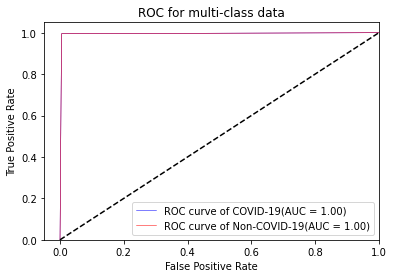

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
#f = plt.subplots(figsize=(5, 5))
PRED = to_categorical(pred)
num_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
       fpr[i], tpr[i], _ = roc_curve(y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])
       colors = ['blue', 'red']
cls = {0:'COVID-19', 1:'Non-COVID-19'}
for i, color ,c in zip(range(num_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [17]:
# save model and architecture to single file
cnn_model.save("Layer_2_model.h5")

In [18]:
cnn_model.save("./model_layer2/CNN")

INFO:tensorflow:Assets written to: ./model_layer2/CNN\assets
